# Graduate Admission

Problem Statement ::
Creating a robust predictive model that estimates graduate admission by analyzing crucial parameters. The dataset was meticulously constructed to assist students in effectively narrowing down their university choices based on their profiles. The predicted output provides valuable insights into their prospects of acceptance at specific institutions, aiding them in making informed decisions.

In [47]:
# Importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm    #to generate all Statistical models (linear regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Importing the dataset
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [49]:
df.shape

(500, 9)

In [50]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Exploratory Data Analysis

In [51]:
df.shape

# There are total 500 rows and 9 columns in the entire dataset.

(500, 9)

In [52]:
print(df.columns.tolist())

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [53]:
df.info()### prints out information regarding columns in the data

#### Insight #####
####################

# All the columns are either of integer type or float type hence no need of any feature encoding. 
# There are no missing values in the entire dataset.
# Here the target variable is "Chance of Admit" and its data type is float which shows that this is a regression
# problem.
# Serial No. is not an important feature hence it can be removed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [54]:
# Checking for null values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [55]:
dups = df.duplicated()
df[dups]

# There are no duplicates in the dataset. We can conclude that it is almost a cleaned dataset.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [56]:
df.describe()    #used for calculating some statistical data.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Visualizing the dataset using different plots

In [57]:
# Setting out the correlation matrix

corelation = df.corr()

In [58]:
corelation

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

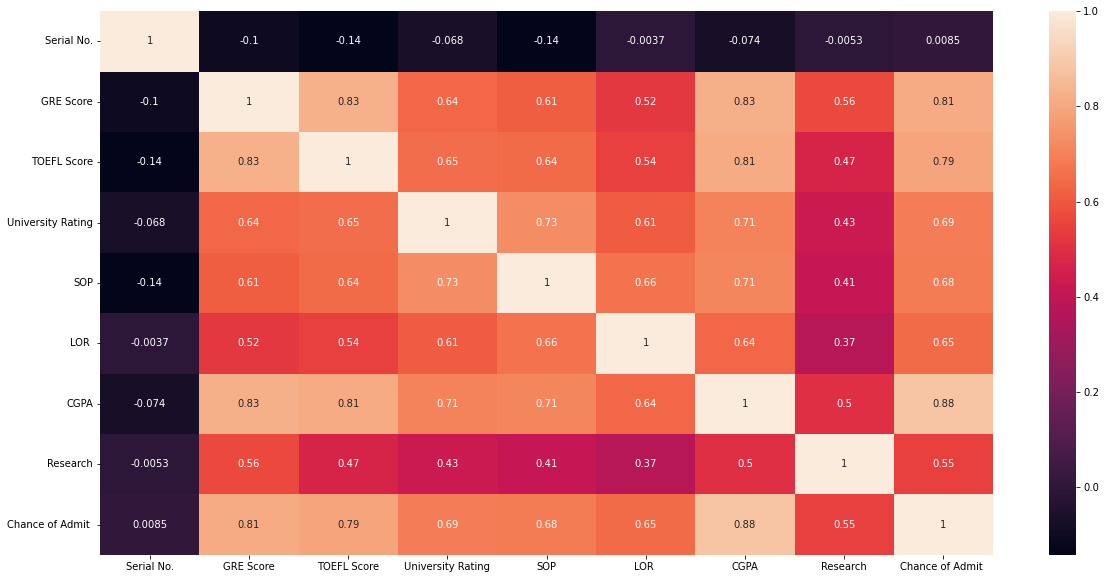

In [59]:
# Plotting of heatmap
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True, ax=ax)
# The features like GRE Score and CGPA have high corelation values (0.81 and 0.88) with the target column "chance of admit."
# So, we can conclude that these two are very impoertant features . Serial No has very low corelation value (0.0085) with
# the target variable hence we can remove that column from the dataset. 

RangeIndex(start=0, stop=500, step=1)


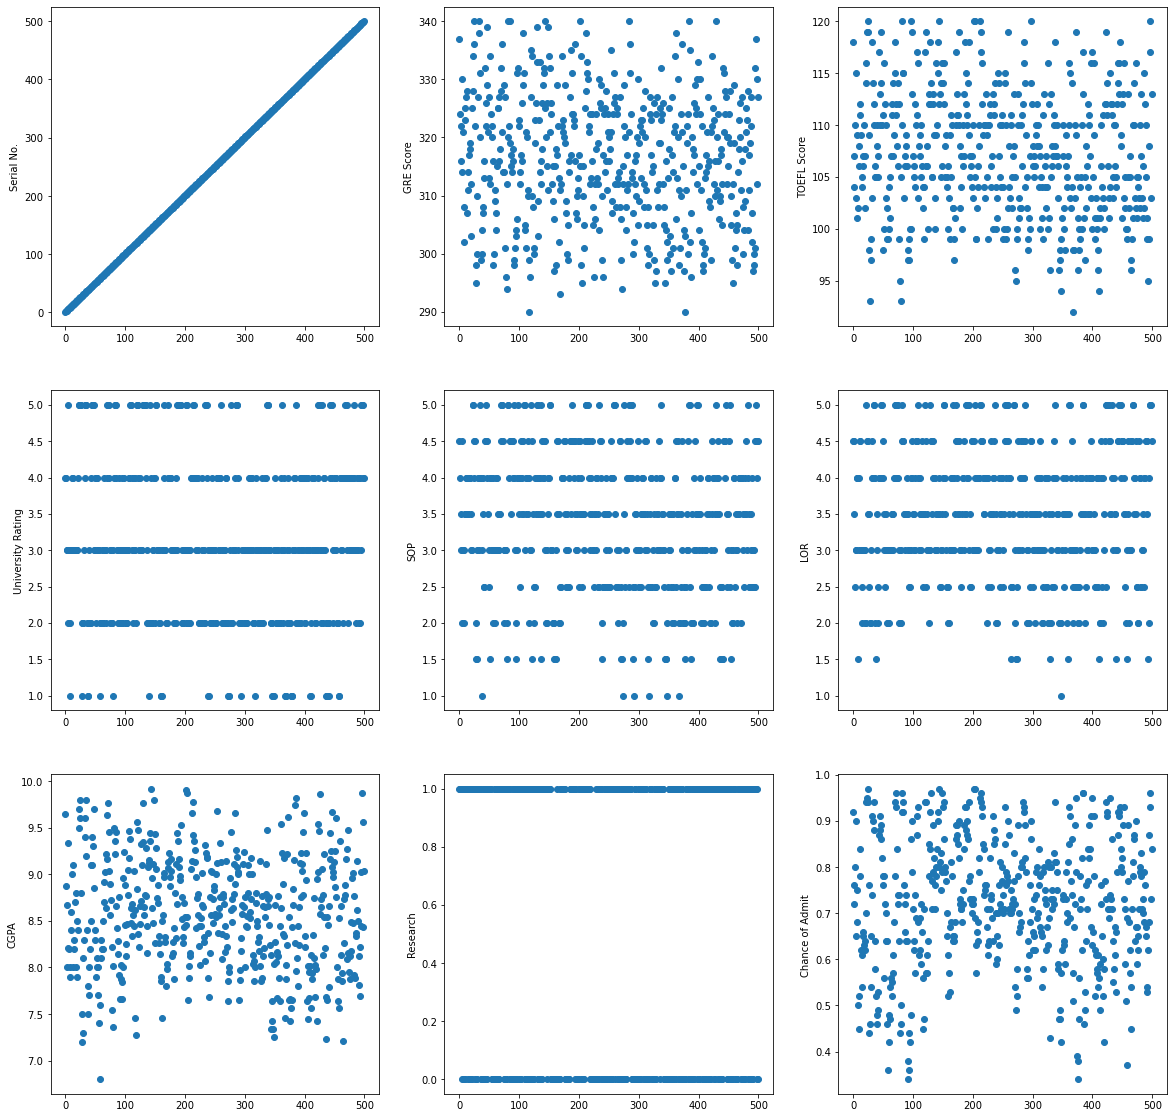

In [60]:
#### Visualizing numeric columns ######

numeric_cols = df.select_dtypes(include = np.number) ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 3
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1
print(numeric_cols.index)

In [61]:
### INSIGHTS ###
# We can conclude that there are few outliers in the entire dataset. 

In [62]:
# Plotting of box plots

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit '>

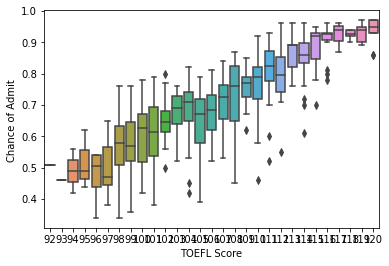

In [63]:
sns.boxplot(x="TOEFL Score" , y='Chance of Admit ', data=df)

# There are few outliers . But we can not remove it since we have to check whether this outliers will 
# effect the output or not.
# Since most of the box plots are separable we can conclude that they are important features in predicting 
# the output.

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

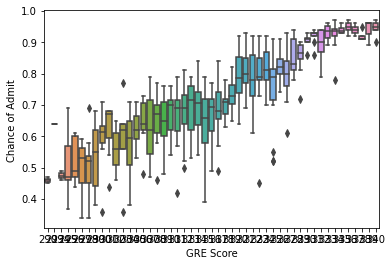

In [64]:
sns.boxplot(x="GRE Score" , y='Chance of Admit ', data=df)


<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

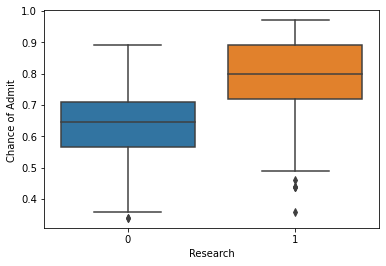

In [65]:
sns.boxplot(x="Research" , y='Chance of Admit ', data=df)

In [66]:
# Let us drop the column Serial No from the dataset and also do feature scaling.

# Feature extraction and scaling

In [67]:
df_new = df.drop(["Serial No."], axis = 1)

In [68]:
df_new.shape

(500, 8)

In [69]:
# Splitting the data set in to dependent(x) and independent(y) variable.

x = df_new.iloc[:,:-1]

In [70]:
y = df_new.iloc[:,-1]

In [71]:
# Feature scaling

## Let us use standarization method for feature scaling. For distance based models like logistic regression feature scaling is 
# required. For non distance based models like Decision tree and Randomforest feature scaling is not required.

In [79]:
# Feateure Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [80]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

# Splitting of the dataset into training and testing

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state = 101, test_size = 0.30)


# Fitting of different regression models

## 1. Linear Regression

In [82]:
lm = LinearRegression()

In [83]:
#Fitting the model and getting the parameter values:

lm.fit(x_train, y_train)
print(lm.intercept_)   #constant
print(lm.coef_)    #slope  #regression coefficient. 

0.7202782311829882
[0.01879194 0.01879032 0.00769518 0.00483014 0.01430453 0.07160817
 0.01069454]


In [84]:
#Predicting a new result
y_train_pred_lm = lm.predict(x_train)
y_test_pred_lm = lm.predict(x_test)

In [85]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_lm), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred_lm), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred_lm), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred_lm), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred_lm), 2))

Mean absolute error = 0.04
Mean squared error = 0.0
Median absolute error = 0.03
Explain variance score = 0.83
R2 score = 0.83


In [86]:
############################# INSIGHTS ###################################

# The values of metrics we received , including mean absolute error (MAE), mean squared error (MSE), median 
# absolute error (MedAE),explained variance score, and R2 score, indicate that the linear regression model is 
#performing very well.

#  1) Mean Absolute Error (MAE): The MAE of 0.04 suggests that, on average, the model's predictions are off 
#  by only a very small amount. This indicates good accuracy in predicting the target variable.

#  2) Mean Squared Error (MSE): The MSE of 0.0 indicates that the model is perfectly predicting the target 
# variable without any errors. However, achieving an MSE of 0.0 is quite rare in practice and may indicate potential 
# issues such as overfitting or problems with the evaluation process.So we should check for overfitting also.

#  3) Median Absolute Error (MedAE): The MedAE of 0.03 suggests that the median difference between model's predictions 
# and the actual values is very small. Similar to MAE, this indicates good accuracy.

# 4) Explained Variance Score: The explained variance score of 0.83 indicates that the model can explain approximately 
# 83% of the variance in the target variable. This is considered a good score, as it means the model captures a significant
# portion of the variability in the data.

# 5) R2 Score: The R2 score of 0.83 also suggests that the model explains 83% of the variance in the target variable. 
# This score indicates that the model performs well and captures a large portion of the variation in the data.

####################################################################################

In [91]:
# Hyperparameter Tuning

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error


# 1. Define the hyperparameters to tune
parameters = {'fit_intercept': [True, False],
              'normalize': [True, False],
              'copy_X': [True, False]}
# 2. Choose a search strategy (Grid Search)
grid_search = GridSearchCV(LinearRegression(), parameters, scoring='neg_mean_squared_error', cv=5)

# 3. Train and evaluate models
grid_search.fit(x_train, y_train)

# 5. Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 6. Evaluate the best model on the validation set
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
# 7. Print the best hyperparameters and model's performance
print("Best Hyperparameters:", best_params)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Best Model MSE: 0.0
Mean absolute error = 0.04
Mean squared error = 0.0
Median absolute error = 0.03
Explain variance score = 0.83
R2 score = 0.83


In [94]:
                                           ########## CONCLUSION #############
    
    
#Here the model metrics did not change significantly after hyperparameter tuning for linear regression, 
# it may indicate that the original model was already performing well, 
# and further optimization did not lead to substantial improvements.
# Here are a few possible conclusions based on the scenario:

### 1) Good initial model: It's possible that the default hyperparameters or initial configuration of the linear
# regression model were already well-suited for the data. The model may have captured the underlying patterns and 
# relationships accurately, resulting in good performance.

### 2) Limited impact of hyperparameters: In some cases, the hyperparameters available for tuning in linear regression 
# may have a limited impact on the model's performance. Linear regression is a relatively simple and interpretable model, 
# and its performance might not be significantly affected by changing hyperparameters compared to more complex models.

### 3) Data characteristics: The dataset itself may not exhibit complex patterns or relationships that can be further 
# improved through hyperparameter tuning. If the data has a linear or near-linear relationship, linear regression may have 
# already achieved optimal performance.

# In summary, if the metrics did not change significantly after hyperparameter tuning, it may indicate that the original 
# linear regression model was already well-performing, and further optimization did not yield substantial improvements.


################################################################################################################################



